## Data Exploration

In [1]:
!head ../data/covid19.fasta

>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA
CGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC
TAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG
TTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC
CCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC
GTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG
CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT
GCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC
GTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT


In [2]:
# sars 
!head ../data/sars.fasta

>NC_004718.3 SARS coronavirus Tor2, complete genome
ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGA
ACTTTAAAATCTGTGTAGCTGTCGCTCGGCTGCATGCCTAGTGCACCTACGCAGTATAAACAATAATAAA
TTTTACTGTCGTTGACAAGAAACGAGTAACTCGTCCCTCTTCTGCAGACTGCTTACGGTTTCGTCCGTGT
TGCAGTCGATCATCAGCATACCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTTC
TTGGTGTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTCCTTCAGGTTAGAGACGTGCTAGTGCG
TGGCTTCGGGGACTCTGTGGAAGAGGCCCTATCGGAGGCACGTGAACACCTCAAAAATGGCACTTGTGGT
CTAGTAGAGCTGGAAAAAGGCGTACTGCCCCAGCTTGAACAGCCCTATGTGTTCATTAAACGTTCTGATG
CCTTAAGCACCAATCACGGCCACAAGGTCGTTGAGCTGGTTGCAGAAATGGACGGCATTCAGTACGGTCG
TAGCGGTATAACACTGGGAGTACTCGTGCCACATGTGGGCGAAACCCCAATTGCATACCGCAATGTTCTT


In [3]:
# mers 
!head ../data/mers.fasta

>NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome
GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTTTGATTTTAACGAACTT
AAATAAAAGCCCTGTTGTTTAGCGTATCGTTGCACTTGTCTGGTGGGATTGTGGCATTAATTTGCCTGCT
CATCTAGGCAGTGGACATATGCTCAACACTGGGTATAATTCTAATTGAATACTATTTTTCAGTTAGAGCG
TCGTGTCTCTTGTACGTCTCGGTCACAATACACGGTTTCGTCCGGTGCGTGGCAATTCGGGGCACATCAT
GTCTTTCGTGGCTGGTGTGACCGCGCAAGGTGCGCGCGGTACGTATCGAGCAGCGCTCAACTCTGAAAAA
CATCAAGACCATGTGTCTCTAACTGTGCCACTCTGTGGTTCAGGAAACCTGGTTGAAAAACTTTCACCAT
GGTTCATGGATGGCGAAAATGCCTATGAAGTGGTGAAGGCCATGTTACTTAAAAAGGAGCCACTTCTCTA
TGTGCCCATCCGGCTGGCTGGACACACTAGACACCTCCCAGGTCCTCGTGTGTACCTGGTTGAGAGGCTC
ATTGCTTGTGAAAATCCATTCATGGTTAACCAATTGGCTTATAGCTCTAGTGCAAATGGCAGCCTGGTTG


In [4]:
# ebola 
!head ../data/ebola.fasta

>NC_002549.1 Zaire ebolavirus isolate Ebola virus/H.sapiens-tc/COD/1976/Yambuku-Mayinga, complete genome
CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTATGAGGAAGATTAATAA
TTTTCCTCTCATTGAAATTTATATCGGAATTTAAATTGAAATTGTTACTGTAATCACACCTGGTTTGTTT
CAGAGCCACATCACAAAGATAGAGAACAACCTAGGTCTCCGAAGGGAGCAAGGGCATCAGTGTGCTCAGT
TGAAAATCCCTTGTCAACACCTAGGTCTTATCACATCACAAGTTCCACCTCAGACTCTGCAGGGTGATCC
AACAACCTTAATAGAAACATTATTGTTAAAGGACAGCATTAGTTCACAGTCAAACAAGCAAGATTGAGAA
TTAACCTTGGTTTTGAACTTGAACACTTAGGGGATTGAAGATTCAACAACCCTAAAGCTTGGGGTAAAAC
ATTGGAAATAGTTAAAAGACAAATTGCTCGGAATCACAAAATTCCGAGTATGGATTCTCGTCCTCAGAAA
ATCTGGATGGCGCCGAGTCTCACTGAATCTGACATGGATTACCACAAGATCTTGACAGCAGGTCTGTCCG
TTCAACAGGGGATTGTTCGGCAAAGAGTCATCCCAGTGTATCAAGTAAACAATCTTGAAGAAATTTGCCA


## Packages 

In [1]:
from Bio import SeqIO
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

## Data Import 

In [2]:
def readFASTA(inputfile): 
    """Reads a FASTA file and returns it with special character removed"""
    for record in SeqIO.parse(inputfile, "fasta"): 
        seq = record.seq
    return seq 

In [3]:
# covid19 
covid = readFASTA('../data/covid19.fasta')
# sars 
sars = readFASTA('../data/sars.fasta')
# mers
mers = readFASTA('../data/mers.fasta')
# ebola 
ebola = readFASTA('../data/ebola.fasta')

## Length

In [4]:
print(f'Length of COVID-19: {len(covid)}')
print(f'Length of SARS: {len(sars)}')
print(f'Length of MERS: {len(mers)}')
print(f'Length of Ebola: {len(ebola)}')

Length of COVID-19: 29903
Length of SARS: 29751
Length of MERS: 30119
Length of Ebola: 18959


## Nucleotide Frequency

In [5]:
from collections import Counter 
def nt_frequency(seq): 
    """Returns the frequency distribution of nucleotides"""
    freqs = Counter(seq)
    return freqs 

In [6]:
# covid19 
freq_covid = nt_frequency(covid)
freq_covid 

Counter({'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492})

In [14]:
# sars 
freq_sars = nt_frequency(sars)
freq_sars 

Counter({'A': 8481, 'T': 9143, 'G': 6187, 'C': 5940})

In [15]:
# mers 
freq_mers = nt_frequency(mers)
freq_mers

Counter({'G': 6304, 'A': 7900, 'T': 9799, 'C': 6116})

In [16]:
# ebola 
freq_ebola = nt_frequency(ebola)
freq_ebola  

Counter({'C': 4035, 'G': 3752, 'A': 6061, 'T': 5111})

## Plot Nucleotide Frequency

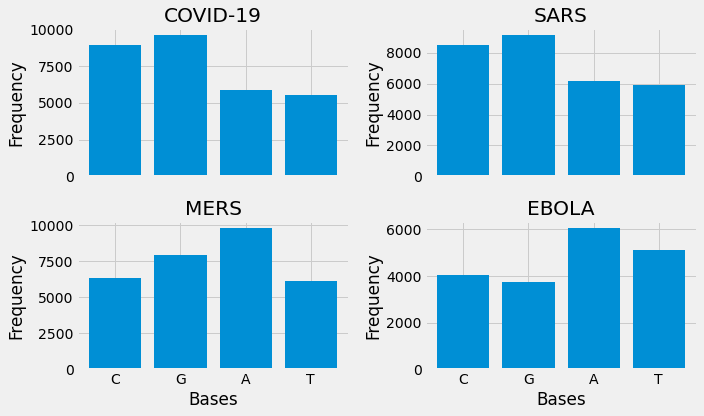

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10,6))

# ax1
freq1 = nt_frequency(covid)
ax1.bar(freq1.keys(), freq1.values())
ax1.set_title("COVID-19")
ax1.set_ylabel("Frequency")

# ax2 
freq2 = nt_frequency(sars)
ax2.bar(freq2.keys(), freq2.values())
ax2.set_title("SARS")
ax2.set_ylabel("Frequency")

# ax3
freq3 = nt_frequency(mers)
ax3.bar(freq3.keys(), freq3.values())
ax3.set_title("MERS")
ax3.set_xlabel("Bases")
ax3.set_ylabel("Frequency")


# ax4 
freq4 = nt_frequency(ebola)
ax4.bar(freq4.keys(), freq4.values())
ax4.set_title("EBOLA")
ax4.set_xlabel("Bases")
ax4.set_ylabel("Frequency")

plt.tight_layout() 
plt.savefig('../Output_figs/nt_comparison_plot.png', dpi=200)
plt.show() 

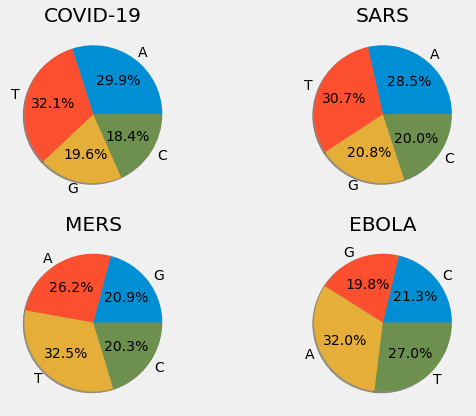

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10,6))
# ax1 
freq1 = nt_frequency(covid)
ax1.pie(freq1.values(), labels=freq1.keys(), autopct='%1.1f%%', shadow=True)
ax1.set_title("COVID-19")
# ax2 
freq2 = nt_frequency(sars)
ax2.pie(freq2.values(), labels=freq2.keys(), autopct='%1.1f%%', shadow=True)
ax2.set_title("SARS")

# ax3
freq3 = nt_frequency(mers)
ax3.pie(freq3.values(), labels=freq3.keys(), autopct='%1.1f%%', shadow=True)
ax3.set_title("MERS")

# ax4 
freq4 = nt_frequency(ebola)
ax4.pie(freq4.values(), labels=freq4.keys(), autopct='%1.1f%%', shadow=True)
ax4.set_title("EBOLA")

# layout
plt.tight_layout()
plt.savefig('../Output_figs/pie_comparison_plot.png', dpi=300)
plt.show() 

## GC Distribution

In [19]:
def calculate_gc(seq): 
    """Function to calculate GC ratio"""
    no_of_g = seq.count('G')
    no_of_c = seq.count('C')
    total = no_of_c + no_of_g
    gc = round(total/len(seq) * 100, 2)
    return gc 

In [21]:
gc_covid = calculate_gc(covid)
gc_covid

37.97

In [22]:
gc_sars = calculate_gc(sars)
gc_sars

40.76

In [23]:
gc_mers = calculate_gc(mers)
gc_mers

41.24

In [24]:
gc_ebola = calculate_gc(ebola)
gc_ebola

41.07

## Plot GC Distribution

In [25]:
def subseqgc(seq, window=300): 
    """Function to calculate sub-sequence GC ratio"""
    res = [] 
    for i in range(0, len(seq)-window+1, window): 
        subseq = seq[i:i+window] 
        gc = calculate_gc(subseq) 
        res.append(gc)
    
    return res    

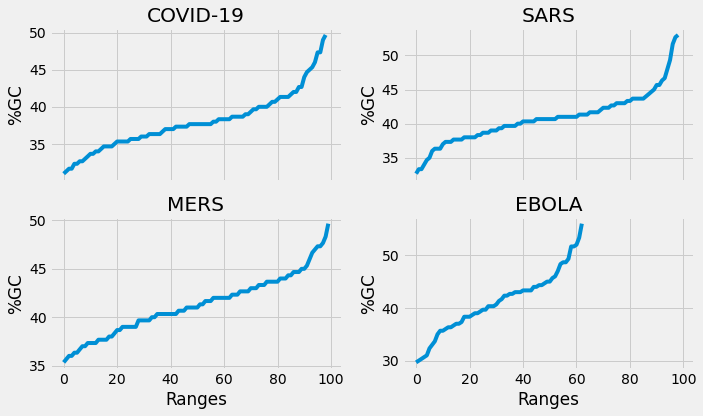

In [26]:
fig , ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10,6))  
# ax1
gc1 = subseqgc(covid)
ax1.plot(range(len(gc1)), sorted(gc1))
ax1.set_ylabel('%GC')
ax1.set_title('COVID-19')



# ax2  
gc2 = subseqgc(sars)
ax2.plot(range(len(gc2)), sorted(gc2))
ax2.set_ylabel('%GC')
ax2.set_title('SARS')

              
# ax3  
gc3 = subseqgc(mers)
ax3.plot(range(len(gc3)), sorted(gc3))
ax3.set_xlabel("Ranges")
ax3.set_ylabel('%GC')
ax3.set_title('MERS')              
              
              
# ax4 
gc4 = subseqgc(ebola)
ax4.plot(range(len(gc4)), sorted(gc4))
ax4.set_xlabel("Ranges")
ax4.set_ylabel('%GC')
ax4.set_title('EBOLA')
plt.tight_layout() 
plt.savefig('../Output_figs/gcsub_comaprison.png', dpi=200)
plt.show() 

## Sequence Alignment

In [8]:
from Bio import pairwise2 
from Bio.pairwise2 import format_alignment 

In [10]:
# covid and sars 
alignments = pairwise2.align.globalxx(covid[:10], sars[:10])
print(alignments)

[Alignment(seqA='ATTAA--AGGTT', seqB='A-T-ATTAGGTT', score=8.0, start=0, end=12), Alignment(seqA='ATTAA--AGGTT', seqB='AT--ATTAGGTT', score=8.0, start=0, end=12), Alignment(seqA='ATTAA--AGGTT', seqB='A-TA-TTAGGTT', score=8.0, start=0, end=12), Alignment(seqA='ATTAA--AGGTT', seqB='AT-A-TTAGGTT', score=8.0, start=0, end=12), Alignment(seqA='ATTAA-AGGTT', seqB='A-TATTAGGTT', score=8.0, start=0, end=11), Alignment(seqA='ATTAA-AGGTT', seqB='AT-ATTAGGTT', score=8.0, start=0, end=11), Alignment(seqA='AT-TAA-AGGTT', seqB='ATAT--TAGGTT', score=8.0, start=0, end=12), Alignment(seqA='ATTA-AAGGTT', seqB='A-TATTAGGTT', score=8.0, start=0, end=11), Alignment(seqA='ATTA-AAGGTT', seqB='AT-ATTAGGTT', score=8.0, start=0, end=11), Alignment(seqA='AT-TAAAGGTT', seqB='ATAT-TAGGTT', score=8.0, start=0, end=11), Alignment(seqA='AT-TAAAGGTT', seqB='ATATT-AGGTT', score=8.0, start=0, end=11), Alignment(seqA='AT--TAAAGGTT', seqB='ATATT--AGGTT', score=8.0, start=0, end=12), Alignment(seqA='A--TTAAAGGTT', seqB='AT

In [12]:
print(format_alignment(*alignments[0]))

ATTAA--AGGTT
| | |  |||||
A-T-ATTAGGTT
  Score=8



In [13]:
print(format_alignment(*alignments[1]))

ATTAA--AGGTT
||  |  |||||
AT--ATTAGGTT
  Score=8



In [18]:
for align in alignments: 
    print(format_alignment(*align))

ATTAA--AGGTT
| | |  |||||
A-T-ATTAGGTT
  Score=8

ATTAA--AGGTT
||  |  |||||
AT--ATTAGGTT
  Score=8

ATTAA--AGGTT
| ||   |||||
A-TA-TTAGGTT
  Score=8

ATTAA--AGGTT
|| |   |||||
AT-A-TTAGGTT
  Score=8

ATTAA-AGGTT
| ||. |||||
A-TATTAGGTT
  Score=8

ATTAA-AGGTT
|| |. |||||
AT-ATTAGGTT
  Score=8

AT-TAA-AGGTT
|| |   |||||
ATAT--TAGGTT
  Score=8

ATTA-AAGGTT
| || .|||||
A-TATTAGGTT
  Score=8

ATTA-AAGGTT
|| | .|||||
AT-ATTAGGTT
  Score=8

AT-TAAAGGTT
|| | .|||||
ATAT-TAGGTT
  Score=8

AT-TAAAGGTT
|| |. |||||
ATATT-AGGTT
  Score=8

AT--TAAAGGTT
||  |  |||||
ATATT--AGGTT
  Score=8

A--TTAAAGGTT
|  ||  |||||
ATATT--AGGTT
  Score=8

--ATTAAAGGTT
  |||  |||||
ATATT--AGGTT
  Score=8

ATTA--AAGGTT
| ||  | ||||
A-TATTA-GGTT
  Score=8

ATTA--AAGGTT
|| |  | ||||
AT-ATTA-GGTT
  Score=8

AT-TA-AAGGTT
|| |  | ||||
ATAT-TA-GGTT
  Score=8

AT-TAAAGGTT
|| |.| ||||
ATATTA-GGTT
  Score=8

AT--TAAAGGTT
||  | | ||||
ATATT-A-GGTT
  Score=8

A--TTAAAGGTT
|  || | ||||
ATATT-A-GGTT
  Score=8

--ATTAAAGGTT
  ||| | 

In [20]:
# covid and sars 
alignments2 = pairwise2.align.globalxx(covid[:10], sars[:10], one_alignment_only=True, score_only=True)
print(alignments2)

8.0


In [22]:
alignments2/len(covid) * 100

0.026753168578403503

In [23]:
alignments2/len(sars) * 100

0.026889852441934724

In [24]:
# covid and sars 
alignments = pairwise2.align.globalxx(covid[:10], mers[:10])
print(alignments)

[Alignment(seqA='-ATTA-AAGGTT-', seqB='GATT-TAA-G-TG', score=7.0, start=0, end=13), Alignment(seqA='-ATTAAAGGTT-', seqB='GATTTAA-G-TG', score=7.0, start=0, end=12), Alignment(seqA='-AT-TAAAGGTT-', seqB='GATTT-AA-G-TG', score=7.0, start=0, end=13), Alignment(seqA='-A-TTAAAGGTT-', seqB='GATTT-AA-G-TG', score=7.0, start=0, end=13), Alignment(seqA='-ATT-AAAGGTT-', seqB='GATTTA-A-G-TG', score=7.0, start=0, end=13), Alignment(seqA='-AT-TAAAGGTT-', seqB='GATTTA-A-G-TG', score=7.0, start=0, end=13), Alignment(seqA='-A-TTAAAGGTT-', seqB='GATTTA-A-G-TG', score=7.0, start=0, end=13), Alignment(seqA='-ATT-AAAGGTT-', seqB='GATTTAA--G-TG', score=7.0, start=0, end=13), Alignment(seqA='-AT-TAAAGGTT-', seqB='GATTTAA--G-TG', score=7.0, start=0, end=13), Alignment(seqA='-A-TTAAAGGTT-', seqB='GATTTAA--G-TG', score=7.0, start=0, end=13), Alignment(seqA='-ATTA-AAGGTT-', seqB='GATT-TAAG--TG', score=7.0, start=0, end=13), Alignment(seqA='-ATTAAAGGTT-', seqB='GATTTAAG--TG', score=7.0, start=0, end=12), Alignme

In [25]:
# covid and sars 
alignments = pairwise2.align.globalxx(covid[:10], ebola[:10])
print(alignments)

[Alignment(seqA='---ATT-A-A-AGGTT', seqB='CGGA--CACACA----', score=4.0, start=0, end=16), Alignment(seqA='---ATTA-A-AGGTT', seqB='CGGA-CACACA----', score=4.0, start=0, end=15), Alignment(seqA='---ATTA-A-AGGTT', seqB='CGGAC-ACACA----', score=4.0, start=0, end=15)]


In [26]:
# covid and sars 
alignments3 = pairwise2.align.globalxx(covid[:10], ebola[:10], one_alignment_only=True, score_only=True)
print(alignments3)

4.0


In [29]:
(alignments3/len(ebola)) * 100 

0.021098159185611056

In [30]:
# covid and sars 
alignments = pairwise2.align.localxx(covid[:10], ebola[:10])
print(alignments)

[Alignment(seqA='---ATT-A-A-AGGTT', seqB='CGGA--CACACA----', score=4.0, start=3, end=12), Alignment(seqA='---ATTA-A-AGGTT', seqB='CGGA-CACACA----', score=4.0, start=3, end=11), Alignment(seqA='---ATTA-A-AGGTT', seqB='CGGAC-ACACA----', score=4.0, start=3, end=11)]


## Translation

In [32]:
covid_prt = covid.translate() 
sars_prt = sars.translate() 
mers_prt = mers.translate() 
ebola_prt = ebola.translate() 

## Length

In [47]:
print(f'Protein Length of COVID-19: {len(covid_prt)}')
print(f'Protein Length of SARS: {len(sars_prt)}')
print(f'Protein Length of MERS: {len(mers_prt)}')
print(f'Protein Length of Ebola: {len(ebola_prt)}')

Protein Length of COVID-19: 9967
Protein Length of SARS: 9917
Protein Length of MERS: 10039
Protein Length of Ebola: 6319


In [33]:
covid_prt[:100]

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...REN')

## Protein Frequency

In [34]:
from collections import Counter 
def protein_frequency(seq): 
    """Returns the frequency distribution of proteins"""
    freqs = Counter(seq)
    return freqs 

In [37]:
# covid 
protein_frequency(covid_prt)

Counter({'I': 436,
         'K': 413,
         'G': 394,
         'L': 886,
         'Y': 505,
         'P': 292,
         'R': 558,
         '*': 774,
         'Q': 325,
         'T': 679,
         'N': 472,
         'S': 810,
         'C': 635,
         'V': 548,
         'F': 593,
         'A': 375,
         'H': 332,
         'D': 290,
         'E': 270,
         'W': 263,
         'M': 117})

In [39]:
# sars 
protein_frequency(sars_prt)

Counter({'I': 566,
         'L': 1368,
         'G': 438,
         'F': 437,
         'Y': 341,
         'P': 314,
         'R': 417,
         'K': 503,
         'S': 737,
         'Q': 388,
         'T': 689,
         'C': 313,
         'V': 683,
         '*': 272,
         'N': 418,
         'A': 575,
         'H': 298,
         'D': 320,
         'M': 365,
         'E': 365,
         'W': 110})

In [41]:
# mers 
protein_frequency(mers_prt)

Counter({'D': 121,
         'L': 1711,
         'S': 852,
         'E': 157,
         '*': 689,
         'G': 293,
         'Y': 348,
         'T': 564,
         'P': 384,
         'R': 520,
         'A': 418,
         'F': 453,
         'I': 565,
         'K': 345,
         'V': 651,
         'H': 338,
         'C': 506,
         'W': 203,
         'Q': 337,
         'N': 285,
         'M': 299})

In [42]:
# ebola 
protein_frequency(ebola_prt)

Counter({'R': 437,
         'T': 384,
         'H': 235,
         'K': 344,
         'E': 253,
         'F': 277,
         'L': 662,
         'G': 277,
         'S': 623,
         'V': 268,
         'C': 165,
         '*': 249,
         'I': 371,
         'A': 280,
         'Q': 330,
         'N': 294,
         'P': 288,
         'Y': 192,
         'W': 88,
         'D': 211,
         'M': 91})

## Most Common AA(Amino Acids) 

In [48]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis 

In [54]:
analyzed_covid = ProteinAnalysis(str(covid_prt))
analyzed_sars = ProteinAnalysis(str(sars_prt))
analyzed_mers = ProteinAnalysis(str(mers_prt))
analyzed_ebola = ProteinAnalysis(str(ebola_prt))

In [55]:
analyzed_covid.count_amino_acids() 

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [56]:
analyzed_sars.count_amino_acids() 

{'A': 575,
 'C': 313,
 'D': 320,
 'E': 365,
 'F': 437,
 'G': 438,
 'H': 298,
 'I': 566,
 'K': 503,
 'L': 1368,
 'M': 365,
 'N': 418,
 'P': 314,
 'Q': 388,
 'R': 417,
 'S': 737,
 'T': 689,
 'V': 683,
 'W': 110,
 'Y': 341}

In [57]:
analyzed_mers.count_amino_acids() 

{'A': 418,
 'C': 506,
 'D': 121,
 'E': 157,
 'F': 453,
 'G': 293,
 'H': 338,
 'I': 565,
 'K': 345,
 'L': 1711,
 'M': 299,
 'N': 285,
 'P': 384,
 'Q': 337,
 'R': 520,
 'S': 852,
 'T': 564,
 'V': 651,
 'W': 203,
 'Y': 348}

In [58]:
analyzed_ebola.count_amino_acids() 

{'A': 280,
 'C': 165,
 'D': 211,
 'E': 253,
 'F': 277,
 'G': 277,
 'H': 235,
 'I': 371,
 'K': 344,
 'L': 662,
 'M': 91,
 'N': 294,
 'P': 288,
 'Q': 330,
 'R': 437,
 'S': 623,
 'T': 384,
 'V': 268,
 'W': 88,
 'Y': 192}

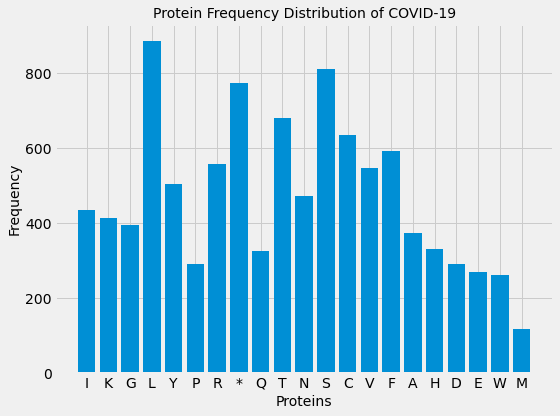

In [43]:
# covid19 
plt.figure(figsize=(8,6))
freq = protein_frequency(covid_prt)
plt.bar(freq.keys(), freq.values())
plt.xlabel('Proteins', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Protein Frequency Distribution of COVID-19', fontsize=14)
plt.tight_layout() 
plt.savefig('../Output_figs/covid_protein_frequency.pdf')
plt.show() 

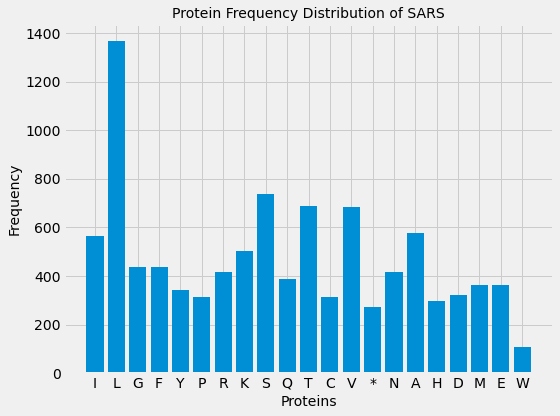

In [44]:
# sars 
plt.figure(figsize=(8,6))
freq = protein_frequency(sars_prt)
plt.bar(freq.keys(), freq.values())
plt.xlabel('Proteins', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Protein Frequency Distribution of SARS', fontsize=14)
plt.tight_layout() 
plt.savefig('../Output_figs/sars_protein_frequency.pdf')
plt.show() 

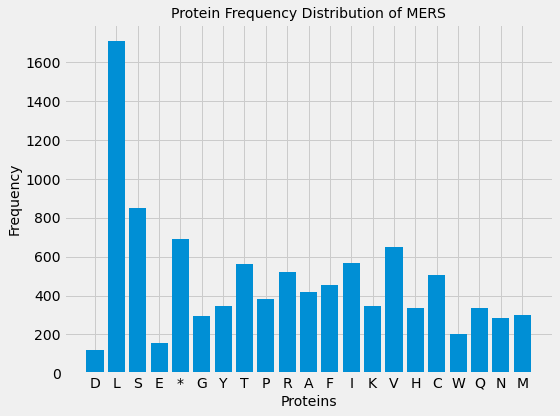

In [45]:
# mers 
plt.figure(figsize=(8,6))
freq = protein_frequency(mers_prt)
plt.bar(freq.keys(), freq.values())
plt.xlabel('Proteins', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Protein Frequency Distribution of MERS', fontsize=14)
plt.tight_layout() 
plt.savefig('../Output_figs/mers_protein_frequency.pdf')
plt.show() 

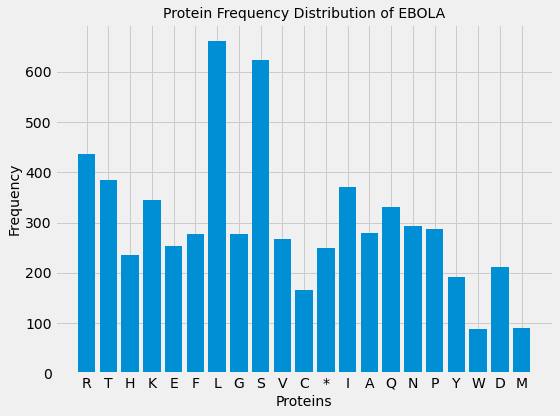

In [46]:
# ebola 
plt.figure(figsize=(8,6))
freq = protein_frequency(ebola_prt)
plt.bar(freq.keys(), freq.values())
plt.xlabel('Proteins', fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Protein Frequency Distribution of EBOLA', fontsize=14)
plt.tight_layout() 
plt.savefig('../Output_figs/ebola_protein_frequency.pdf')
plt.show() 

In [59]:
from Bio import pairwise2 
from Bio.pairwise2 import format_alignment 

In [61]:
alignments = pairwise2.align.globalxx(covid_prt[:10], sars_prt[:10])
print(alignments)

[Alignment(seqA='IKGL--YLPR*Q--', seqB='I--LGFYLPR--KS', score=6.0, start=0, end=14), Alignment(seqA='IK-GL-YLPR*Q--', seqB='I-LG-FYLPR--KS', score=6.0, start=0, end=14), Alignment(seqA='IKGL-YLPR*Q--', seqB='ILG-FYLPR--KS', score=6.0, start=0, end=13), Alignment(seqA='IK-GLYLPR*Q--', seqB='I-LGFYLPR--KS', score=6.0, start=0, end=13), Alignment(seqA='IKGLYLPR*Q--', seqB='ILGFYLPR--KS', score=6.0, start=0, end=12), Alignment(seqA='IKGL--YLPR*Q-', seqB='I--LGFYLPR-KS', score=6.0, start=0, end=13), Alignment(seqA='IK-GL-YLPR*Q-', seqB='I-LG-FYLPR-KS', score=6.0, start=0, end=13), Alignment(seqA='IKGL-YLPR*Q-', seqB='ILG-FYLPR-KS', score=6.0, start=0, end=12), Alignment(seqA='IK-GLYLPR*Q-', seqB='I-LGFYLPR-KS', score=6.0, start=0, end=12), Alignment(seqA='IKGLYLPR*Q-', seqB='ILGFYLPR-KS', score=6.0, start=0, end=11), Alignment(seqA='IKGL--YLPR*Q-', seqB='I--LGFYLPRK-S', score=6.0, start=0, end=13), Alignment(seqA='IK-GL-YLPR*Q-', seqB='I-LG-FYLPRK-S', score=6.0, start=0, end=13), Alignment

In [64]:
print(format_alignment(*alignments[0]))

IKGL--YLPR*Q--
|  |  ||||    
I--LGFYLPR--KS
  Score=6



In [66]:
for a in alignments: 
    print(format_alignment(*a)) 

IKGL--YLPR*Q--
|  |  ||||    
I--LGFYLPR--KS
  Score=6

IK-GL-YLPR*Q--
|  |  ||||    
I-LG-FYLPR--KS
  Score=6

IKGL-YLPR*Q--
|.|  ||||    
ILG-FYLPR--KS
  Score=6

IK-GLYLPR*Q--
|  |.||||    
I-LGFYLPR--KS
  Score=6

IKGLYLPR*Q--
|.|.||||    
ILGFYLPR--KS
  Score=6

IKGL--YLPR*Q-
|  |  |||| . 
I--LGFYLPR-KS
  Score=6

IK-GL-YLPR*Q-
|  |  |||| . 
I-LG-FYLPR-KS
  Score=6

IKGL-YLPR*Q-
|.|  |||| . 
ILG-FYLPR-KS
  Score=6

IK-GLYLPR*Q-
|  |.|||| . 
I-LGFYLPR-KS
  Score=6

IKGLYLPR*Q-
|.|.|||| . 
ILGFYLPR-KS
  Score=6

IKGL--YLPR*Q-
|  |  ||||.  
I--LGFYLPRK-S
  Score=6

IK-GL-YLPR*Q-
|  |  ||||.  
I-LG-FYLPRK-S
  Score=6

IKGL-YLPR*Q-
|.|  ||||.  
ILG-FYLPRK-S
  Score=6

IK-GLYLPR*Q-
|  |.||||.  
I-LGFYLPRK-S
  Score=6

IKGLYLPR*Q-
|.|.||||.  
ILGFYLPRK-S
  Score=6

IKGL--YLPR*-Q
|  |  ||||  .
I--LGFYLPR-KS
  Score=6

IK-GL-YLPR*-Q
|  |  ||||  .
I-LG-FYLPR-KS
  Score=6

IKGL-YLPR*-Q
|.|  ||||  .
ILG-FYLPR-KS
  Score=6

IK-GLYLPR*-Q
|  |.||||  .
I-LGFYLPR-KS
  Score=6

IKGLYLPR*-Q
|.|.||||

In [67]:
alignments = pairwise2.align.globalxx(covid_prt[:10], sars_prt[:10], one_alignment_only=True, score_only=True)
print(alignments)

6.0


In [68]:
alignments/len(covid_prt)

0.0006019865556335909